#Practical Time Series Analysis and Forecast

###Importing libraries

In [ ]:
!pip install prophet
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.stattools import adfuller

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###Loading the Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Time_series_analysis_and_forecast_DATASET (1).csv')
df

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [ ]:
#checking for null values
df.isna().any()

FullDate     False
Tmax         False
SysLoad      False
GasPrice     False
ElecPrice    False
dtype: bool

There are no null values in the dataset.

In [ ]:
#checking for duplicate values
df.duplicated().any()

False

There are no duplicate values in the dataset.

In [ ]:
#converting the date column to datetime type
df['FullDate'] = pd.to_datetime(df['FullDate'])

In [ ]:
#setting the index of the dataframe to the date column
df.set_index('FullDate', inplace=True)

In [ ]:
#resampling the dataset to daily values
df_daily = df.resample('D').sum()

In [ ]:
df_daily.shape

(3834, 4)

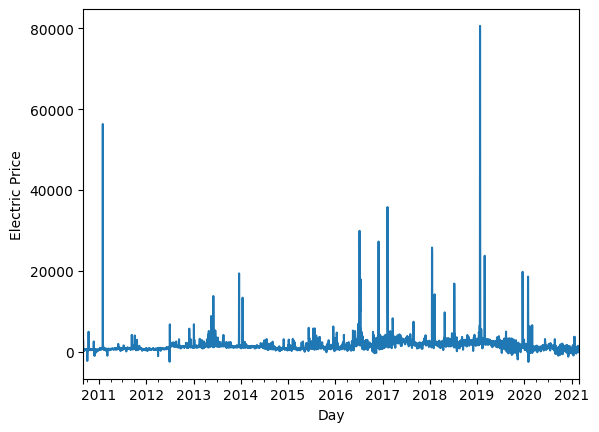

In [ ]:
df_daily['ElecPrice'].plot()
plt.ylabel('Electric Price')
plt.xlabel('Day')
plt.show()

###ADF Test

In [ ]:
result_sys = adfuller(df['SysLoad'], autolag='AIC')

In [ ]:
print(f"The p-value for Sys Load is {result_sys[1]}")

The p-value for Sys Load is 2.4474966090685618e-30


In [ ]:
result_gas = adfuller(df['GasPrice'])

In [ ]:
print(f"The p-value for Gas price Load is {result_gas[1]}")

The p-value for Gas price Load is 2.3337605343635883e-09


In [ ]:

print("The critical values for Gas price")
for k,v in result_gas[4].items():
  print(f'{k}: {v}')

The critical values for Gas price
1%: -3.430421106837576
5%: -2.86157142807793
10%: -2.566786728071412


In [ ]:
result_elec = adfuller(df['ElecPrice'])

In [ ]:
print(f"The p-value for Electric price is {result_elec[1]}")

The p-value for Electric price is 0.0


In [ ]:

print("The critical values for Electric price")
for m,n in result_elec[4].items():
  print(f'{m}: {n}')

The critical values for Electric price
1%: -3.430421110703783
5%: -2.8615714297867108
10%: -2.56678672898094


###Univariate testing with Fbprophet

In [ ]:
df_univariate = df_daily[['ElecPrice']]

In [ ]:
df_univariate.head()

,ElecPrice
FullDate,
2010-09-01,2751.700
2010-09-02,570.810
2010-09-03,504.975
2010-09-04,502.275
2010-09-05,500.555


In [ ]:
df_univariate.reset_index(inplace=True)

In [ ]:
df_univariate = df_univariate.rename(columns={'FullDate':'ds', 'ElecPrice':'y'})

In [ ]:
df_train_univariate = df_univariate.iloc[:2757]

In [ ]:
df_train_univariate.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [ ]:
df_test_univariate = df_univariate.iloc[2757:][['ds']]

In [ ]:
df_test_univariate.head()

,ds
2757,2018-03-20
2758,2018-03-21
2759,2018-03-22
2760,2018-03-23
2761,2018-03-24


In [ ]:
model = Prophet()
model.fit(df_train_univariate)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp93ca20if/w6005tii.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp93ca20if/ei50kxle.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37909', 'data', 'file=/tmp/tmp93ca20if/w6005tii.json', 'init=/tmp/tmp93ca20if/ei50kxle.json', 'output', 'file=/tmp/tmp93ca20if/prophet_model0b0rsj4e/prophet_model-20230404191541.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:15:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:15:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = model.predict(df_test_univariate)

In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2687.807715,248.566655,4960.102864,2687.807715,2687.807715,-155.281939,-155.281939,-155.281939,9.737752,9.737752,9.737752,-165.019691,-165.019691,-165.019691,0.0,0.0,0.0,2532.525776
1,2018-03-21,2688.609367,298.587717,5028.623669,2688.609367,2688.609367,-2.749381,-2.749381,-2.749381,159.365206,159.365206,159.365206,-162.114587,-162.114587,-162.114587,0.0,0.0,0.0,2685.859986
2,2018-03-22,2689.411018,541.389170,5088.710975,2689.411018,2689.411018,95.475991,95.475991,95.475991,257.121966,257.121966,257.121966,-161.645975,-161.645975,-161.645975,0.0,0.0,0.0,2784.887009
3,2018-03-23,2690.212670,166.112994,4940.831924,2690.212670,2690.212670,-113.171619,-113.171619,-113.171619,50.276706,50.276706,50.276706,-163.448325,-163.448325,-163.448325,0.0,0.0,0.0,2577.041051
4,2018-03-24,2691.014321,-117.964095,4498.321364,2691.014321,2691.014321,-438.734727,-438.734727,-438.734727,-271.455065,-271.455065,-271.455065,-167.279662,-167.279662,-167.279662,0.0,0.0,0.0,2252.279594


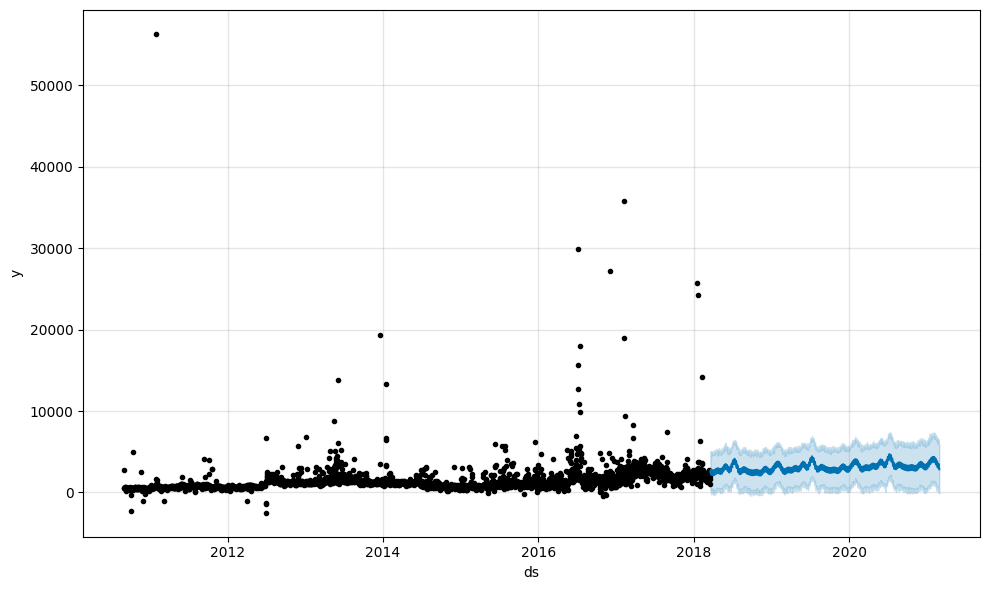

In [ ]:
model.plot(forecast)
plt.show()

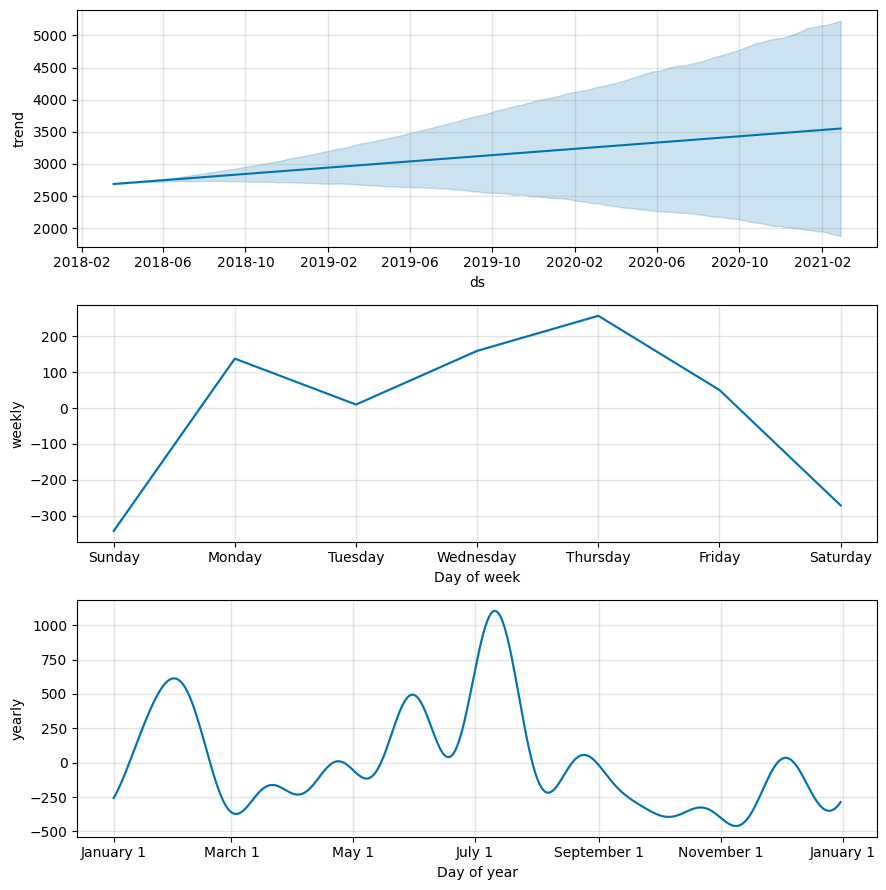

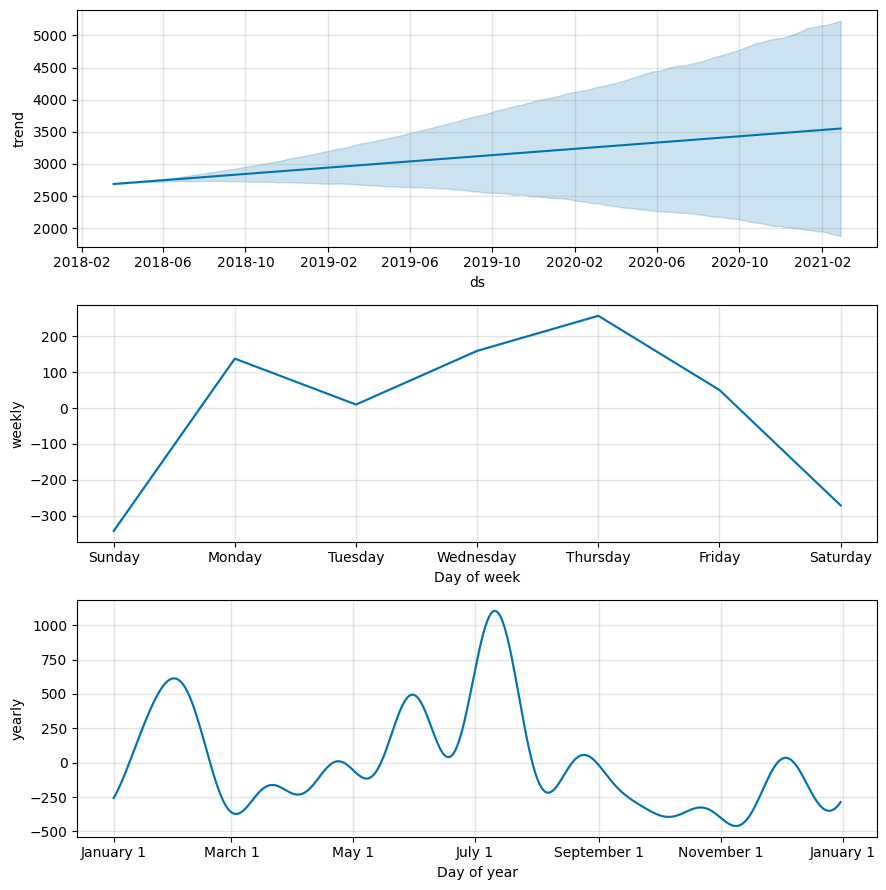

In [ ]:
model.plot_components(forecast)

####Model evaluation

In [ ]:
y_actual = df_univariate.iloc[2757:]['y']
y_predicted = forecast['yhat']
mae = mean_absolute_error(y_actual, y_predicted)

In [ ]:
print(f"The mean absolute error for the univariate testing is {mae}")

The mean absolute error for the univariate testing is 1738.2378842892235


In [ ]:
rmse = mean_squared_error(y_actual, y_predicted)**0.5
print(f"The root mean squared error for the univariate testing is {rmse}")

The root mean squared error for the univariate testing is 3211.82494866135


In [ ]:
mape = mean_absolute_percentage_error(y_actual, y_predicted)
print(f"The mean absolute percentage error for the univariate testing is {mape}")

The mean absolute percentage error for the univariate testing is 5.464558274693029


###Multivariate testing with Fbprophet

In [ ]:
df_multivariate = df_daily.reset_index()

In [ ]:
df_multivariate = df_multivariate.rename(columns={'FullDate':'ds', 'ElecPrice':'y', 'SysLoad':'add1', 'Tmax':'add2','GasPrice':'add3'})

In [ ]:
df_multivariate.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [ ]:
df_train_multivariate = df_multivariate.iloc[0:2757]

In [ ]:
df_train_multivariate.shape

(2757, 5)

In [ ]:
df_test_multivariate = df_multivariate.iloc[2757:][['ds']]

In [ ]:
df_test_multivariate.shape

(1077, 1)

In [ ]:
model2 = Prophet()
model2.fit(df_train_multivariate)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp93ca20if/lk_1qvya.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp93ca20if/1nnru_fp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58756', 'data', 'file=/tmp/tmp93ca20if/lk_1qvya.json', 'init=/tmp/tmp93ca20if/1nnru_fp.json', 'output', 'file=/tmp/tmp93ca20if/prophet_modelac8m0xsc/prophet_model-20230404191545.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:15:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:15:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast2 = model.predict(df_test_multivariate)
forecast2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2687.807715,56.610931,4995.265342,2687.807715,2687.807715,-155.281939,-155.281939,-155.281939,9.737752,9.737752,9.737752,-165.019691,-165.019691,-165.019691,0.0,0.0,0.0,2532.525776
1,2018-03-21,2688.609367,453.463449,4944.603729,2688.609367,2688.609367,-2.749381,-2.749381,-2.749381,159.365206,159.365206,159.365206,-162.114587,-162.114587,-162.114587,0.0,0.0,0.0,2685.859986
2,2018-03-22,2689.411018,211.718404,5195.775398,2689.411018,2689.411018,95.475991,95.475991,95.475991,257.121966,257.121966,257.121966,-161.645975,-161.645975,-161.645975,0.0,0.0,0.0,2784.887009
3,2018-03-23,2690.212670,275.512422,4756.457707,2690.212670,2690.212670,-113.171619,-113.171619,-113.171619,50.276706,50.276706,50.276706,-163.448325,-163.448325,-163.448325,0.0,0.0,0.0,2577.041051
4,2018-03-24,2691.014321,-62.835917,4521.459437,2691.014321,2691.014321,-438.734727,-438.734727,-438.734727,-271.455065,-271.455065,-271.455065,-167.279662,-167.279662,-167.279662,0.0,0.0,0.0,2252.279594


In [ ]:
y_predicted2 =forecast2[['yhat']]
mae_multivariate = mean_absolute_error(y_actual, y_predicted2)

In [ ]:
print(f"The mean absolute error for the multivariate testing is {mae_multivariate}")

The mean absolute error for the multivariate testing is 1738.2378842892235


In [ ]:
rmse_multivariate = mean_squared_error(y_actual, y_predicted2)**0.5
print(f"The root mean squared error for the multivariate testing is {rmse_multivariate}")

The root mean squared error for the multivariate testing is 3211.82494866135


In [ ]:
mape_multivariate = mean_absolute_percentage_error(y_actual, y_predicted2)
print(f"The mean absolute percentage error for the multivariate testing is {mape}")

The mean absolute percentage error for the multivariate testing is 5.464558274693029


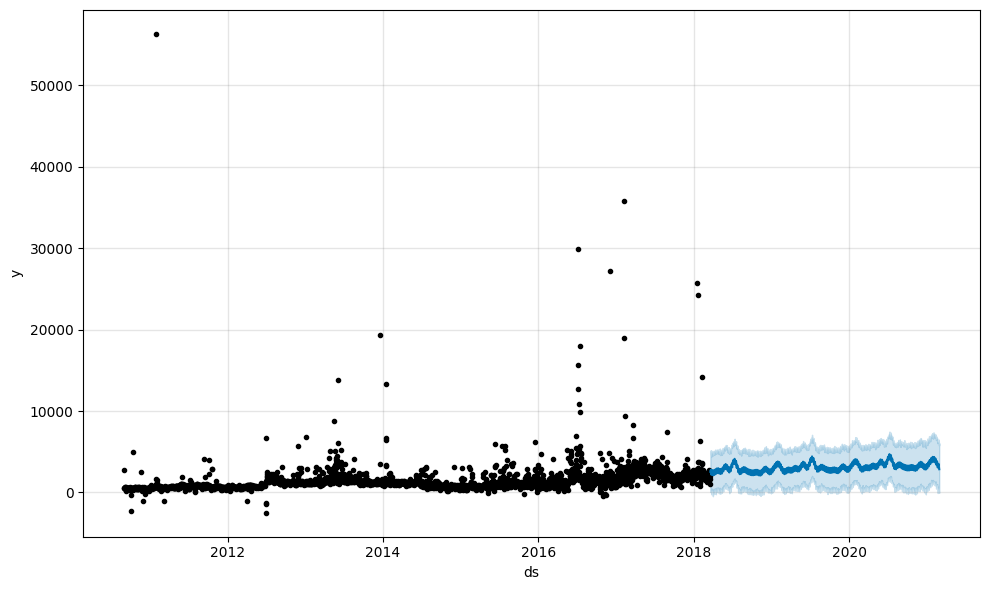

In [ ]:
model2.plot(forecast2)
plt.show()

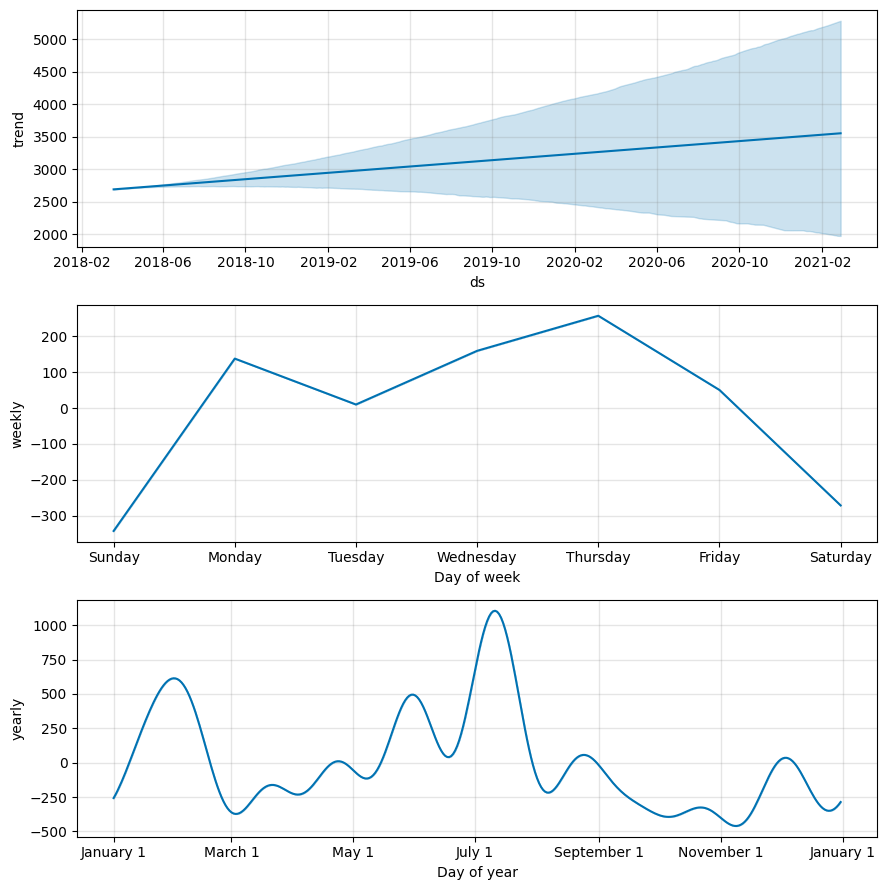

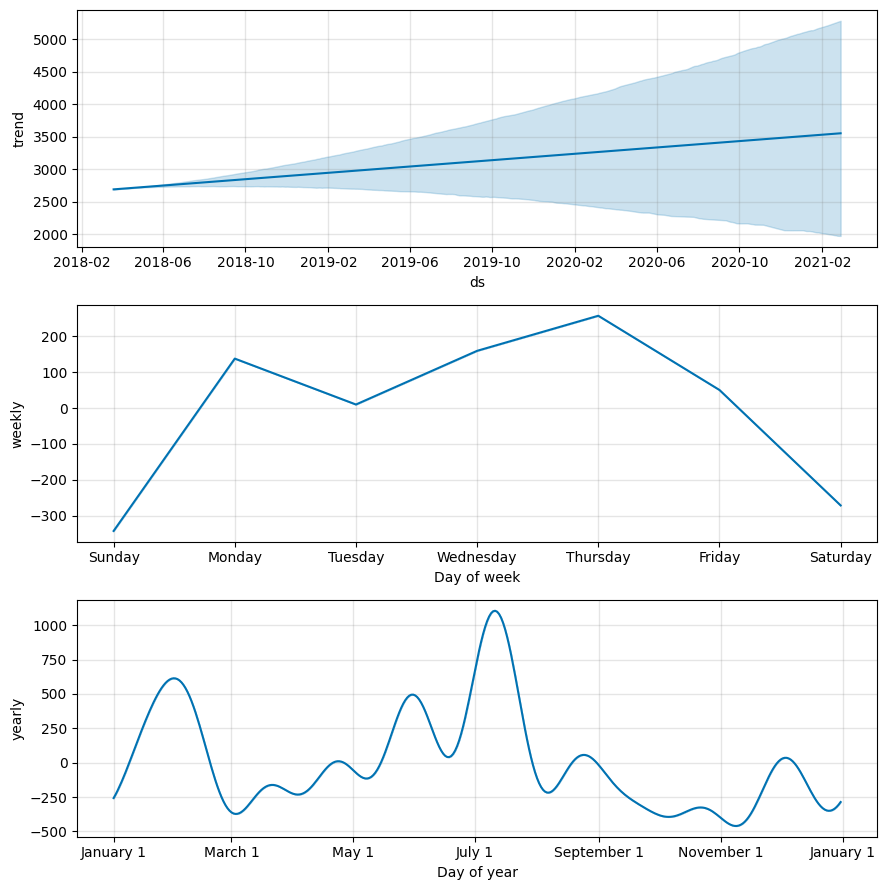

In [ ]:
model2.plot_components(forecast2)